In [74]:
#!pip install --upgrade setuptools

In [75]:
#!pip install contractions

In [76]:
#!pip install inflect

In [77]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### What are contractions in Python?
contractions = { "ain't": "am not / are not / is not / has not / have not", "aren't": "are not / am not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", 

In [78]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [79]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [80]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [81]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [82]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [83]:
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

In [84]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [85]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [86]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [87]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

In [88]:
def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)


In [89]:
product_review= pd.read_csv('apple_iphone_11_reviews.csv',encoding='mac_roman')
product_review.head()

,record,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,NaN,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,NaN,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,NaN,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,NaN,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,NaN,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [90]:
import string
import re
from matplotlib.pyplot import imread

In [91]:
prod_review_text= product_review['review_text'].astype(str)
prod_review_text

0                                                   NOTE:
1       Very bad experience with this iPhone xr phone....
2       Amazing phone with amazing camera coming from ...
3       So I got the iPhone XR just today. The product...
4       I've been an android user all my life until I ...
                              ...                        
5005                                              Dhamaka
5006                                              Goodbye
5007                                              Nothing
5008                                              Superbb
5009                                              Nothing
Name: review_text, Length: 5010, dtype: object

In [92]:
# Joining the list into one string/text
prod_review = ' '.join(prod_review_text)
prod_review 

'NOTE: Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven\'t got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees. Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and thereís a glitch in the front cameraís portrait mode. Thatís fine, it may happen. But whatís not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no responsibility of the product once sold. Talking about the giant, apple, the so called market leaders. Went to the service centre, after running a diagnostic the solution they came up with is sending the phone to Bangalore for repair. Like sending the new phone for repair is the practical solution that the company provides after charging a bomb for the product. 

In [93]:
prod_contractions_remove=replace_contractions(prod_review)
prod_contractions_remove

'NOTE: Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I have not got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees. Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon So I got the iPhone XR just today. The product looks amazing. But unfortunately the Face ID is not working and thereís a glitch in the front cameraís portrait mode. Thatís fine, it may happen. But whatís not fine is the pathetic service provided by amazon and apple. Firstly, amazon takes no responsibility of the product once sold. Talking about the giant, apple, the so called market leaders. Went to the service centre, after running a diagnostic the solution they came up with is sending the phone to Bangalore for repair. Like sending the new phone for repair is the practical solution that the company provides after charging a bomb for the product. 

In [94]:
# Tokenize
prod_words = nltk.word_tokenize(prod_contractions_remove)
print(prod_words)

['NOTE', ':', 'Very', 'bad', 'experience', 'with', 'this', 'iPhone', 'xr', 'phone', '.', 'Back', 'camera', 'found', 'defective', 'and', 'non', 'functional', '.', 'Amazon', 'is', 'very', 'careless', '.', 'I', 'have', 'not', 'got', 'any', 'response', 'on', 'confirmation', 'for', 'replacing', '.', 'I', 'am', 'just', 'hanging', 'with', 'a', 'damaged', 'piece', 'worth', 'of', 'more', 'than', '91000', 'rupees', '.', 'Amazing', 'phone', 'with', 'amazing', 'camera', 'coming', 'from', 'iPhone', '7', 'plus', 'great', 'service', 'from', 'amazon', 'So', 'I', 'got', 'the', 'iPhone', 'XR', 'just', 'today', '.', 'The', 'product', 'looks', 'amazing', '.', 'But', 'unfortunately', 'the', 'Face', 'ID', 'is', 'not', 'working', 'and', 'thereís', 'a', 'glitch', 'in', 'the', 'front', 'cameraís', 'portrait', 'mode', '.', 'Thatís', 'fine', ',', 'it', 'may', 'happen', '.', 'But', 'whatís', 'not', 'fine', 'is', 'the', 'pathetic', 'service', 'provided', 'by', 'amazon', 'and', 'apple', '.', 'Firstly', ',', 'amazon

In [95]:
# Normalize
prod_normalize = normalize(prod_words)
print(prod_normalize)

['note', 'bad', 'experience', 'iphone', 'xr', 'phone', 'back', 'camera', 'found', 'defective', 'non', 'functional', 'amazon', 'careless', 'got', 'response', 'confirmation', 'replacing', 'hanging', 'damaged', 'piece', 'worth', 'ninety-one thousand', 'rupees', 'amazing', 'phone', 'amazing', 'camera', 'coming', 'iphone', 'seven', 'plus', 'great', 'service', 'amazon', 'got', 'iphone', 'xr', 'today', 'product', 'looks', 'amazing', 'unfortunately', 'face', 'id', 'working', 'thereis', 'glitch', 'front', 'camerais', 'portrait', 'mode', 'thatis', 'fine', 'may', 'happen', 'whatis', 'fine', 'pathetic', 'service', 'provided', 'amazon', 'apple', 'firstly', 'amazon', 'takes', 'responsibility', 'product', 'sold', 'talking', 'giant', 'apple', 'called', 'market', 'leaders', 'went', 'service', 'centre', 'running', 'diagnostic', 'solution', 'came', 'sending', 'phone', 'bangalore', 'repair', 'like', 'sending', 'new', 'phone', 'repair', 'practical', 'solution', 'company', 'provides', 'charging', 'bomb', 'p

In [96]:
prod_stem= stem_words(prod_normalize)
print(prod_stem)

['not', 'bad', 'expery', 'iphon', 'xr', 'phon', 'back', 'camer', 'found', 'defect', 'non', 'funct', 'amazon', 'careless', 'got', 'respons', 'confirm', 'replac', 'hang', 'dam', 'piec', 'wor', 'ninety-one thousand', 'rup', 'amaz', 'phon', 'amaz', 'camer', 'com', 'iphon', 'sev', 'plu', 'gre', 'serv', 'amazon', 'got', 'iphon', 'xr', 'today', 'produc', 'look', 'amaz', 'unfortun', 'fac', 'id', 'work', 'ther', 'glitch', 'front', 'camera', 'portrait', 'mod', 'that', 'fin', 'may', 'hap', 'what', 'fin', 'pathet', 'serv', 'provid', 'amazon', 'appl', 'first', 'amazon', 'tak', 'respons', 'produc', 'sold', 'talk', 'giant', 'appl', 'cal', 'market', 'lead', 'went', 'serv', 'cent', 'run', 'diagnost', 'solv', 'cam', 'send', 'phon', 'bang', 'repair', 'lik', 'send', 'new', 'phon', 'repair', 'pract', 'solv', 'company', 'provid', 'charg', 'bomb', 'produc', 'also', 'ment', 'amazonin', 'auth', 'appl', 'resel', 'guess', 'issu', 'esc', 'consum', 'court', 'thank', 'amazon', 'appl', 'android', 'us', 'lif', 'decid

In [97]:
prod_lemma= lemmatize_verbs(prod_stem)
print(prod_lemma)

['not', 'bad', 'expery', 'iphon', 'xr', 'phon', 'back', 'camer', 'find', 'defect', 'non', 'funct', 'amazon', 'careless', 'get', 'respons', 'confirm', 'replac', 'hang', 'dam', 'piec', 'wor', 'ninety-one thousand', 'rup', 'amaz', 'phon', 'amaz', 'camer', 'com', 'iphon', 'sev', 'plu', 'gre', 'serv', 'amazon', 'get', 'iphon', 'xr', 'today', 'produc', 'look', 'amaz', 'unfortun', 'fac', 'id', 'work', 'ther', 'glitch', 'front', 'camera', 'portrait', 'mod', 'that', 'fin', 'may', 'hap', 'what', 'fin', 'pathet', 'serv', 'provid', 'amazon', 'appl', 'first', 'amazon', 'tak', 'respons', 'produc', 'sell', 'talk', 'giant', 'appl', 'cal', 'market', 'lead', 'go', 'serv', 'cent', 'run', 'diagnost', 'solv', 'cam', 'send', 'phon', 'bang', 'repair', 'lik', 'send', 'new', 'phon', 'repair', 'pract', 'solv', 'company', 'provid', 'charg', 'bomb', 'produc', 'also', 'ment', 'amazonin', 'auth', 'appl', 'resel', 'guess', 'issu', 'esc', 'consum', 'court', 'thank', 'amazon', 'appl', 'android', 'us', 'lif', 'decid', 

In [98]:
prod_removestop= remove_stopwords(prod_lemma)
print(prod_removestop)

['bad', 'expery', 'iphon', 'xr', 'phon', 'back', 'camer', 'find', 'defect', 'non', 'funct', 'amazon', 'careless', 'get', 'respons', 'confirm', 'replac', 'hang', 'dam', 'piec', 'wor', 'ninety-one thousand', 'rup', 'amaz', 'phon', 'amaz', 'camer', 'com', 'iphon', 'sev', 'plu', 'gre', 'serv', 'amazon', 'get', 'iphon', 'xr', 'today', 'produc', 'look', 'amaz', 'unfortun', 'fac', 'id', 'work', 'ther', 'glitch', 'front', 'camera', 'portrait', 'mod', 'fin', 'may', 'hap', 'fin', 'pathet', 'serv', 'provid', 'amazon', 'appl', 'first', 'amazon', 'tak', 'respons', 'produc', 'sell', 'talk', 'giant', 'appl', 'cal', 'market', 'lead', 'go', 'serv', 'cent', 'run', 'diagnost', 'solv', 'cam', 'send', 'phon', 'bang', 'repair', 'lik', 'send', 'new', 'phon', 'repair', 'pract', 'solv', 'company', 'provid', 'charg', 'bomb', 'produc', 'also', 'ment', 'amazonin', 'auth', 'appl', 'resel', 'guess', 'issu', 'esc', 'consum', 'court', 'thank', 'amazon', 'appl', 'android', 'us', 'lif', 'decid', 'try', 'iphon', 'xr', '

In [99]:
# Joining the list into one string/text
prod_review_join = ' '.join(prod_removestop)
print(prod_review_join) 

bad expery iphon xr phon back camer find defect non funct amazon careless get respons confirm replac hang dam piec wor ninety-one thousand rup amaz phon amaz camer com iphon sev plu gre serv amazon get iphon xr today produc look amaz unfortun fac id work ther glitch front camera portrait mod fin may hap fin pathet serv provid amazon appl first amazon tak respons produc sell talk giant appl cal market lead go serv cent run diagnost solv cam send phon bang repair lik send new phon repair pract solv company provid charg bomb produc also ment amazonin auth appl resel guess issu esc consum court thank amazon appl android us lif decid try iphon xr io lov camer battery lif absolv joy mon sint get phon lov fac id work flawless ev dark dual sim funct work lik charm us vodafon prim sim jio esim fac problem whatsoev del phon work immedy remov box abl return nee first check appl appl serv tell phon lie without charg sint fiv month hent battery fail leav phon appl repair wait replac battery pleas a

# Emotion Mining

In [100]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [101]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [102]:
import string # special operations on strings
import spacy # language models
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [103]:
prod_min= pd.DataFrame(product_review['review_text']).astype(str)
prod_min

,review_text
0,NOTE:
1,Very bad experience with this iPhone xr phone....
2,Amazing phone with amazing camera coming from ...
3,So I got the iPhone XR just today. The product...
4,I've been an android user all my life until I ...
...,...
5005,Dhamaka
5006,Goodbye
5007,Nothing
5008,Superbb


In [104]:
prod_min['sentiment_value'] = prod_min['review_text'].apply(calculate_sentiment) 

In [105]:
# how many words are in the sentence?
prod_min['word_count'] = prod_min['review_text'].str.split().apply(len)
prod_min['word_count'].head(10) 

0      1
1     42
2     14
3    140
4     79
5     98
6     99
7     10
8     18
9     34
Name: word_count, dtype: int64

In [106]:
prod_min

,review_text,sentiment_value,word_count
0,NOTE:,0,1
1,Very bad experience with this iPhone xr phone....,-6,42
2,Amazing phone with amazing camera coming from ...,11,14
3,So I got the iPhone XR just today. The product...,10,140
4,I've been an android user all my life until I ...,11,79
...,...,...,...
5005,Dhamaka,0,1
5006,Goodbye,0,1
5007,Nothing,0,1
5008,Superbb,0,1


In [107]:
prod_min.sort_values(by='sentiment_value').tail(10) 

,review_text,sentiment_value,word_count
427,I am so happy with amazon.!! Good price and ge...,20,70
46,"Like every time, Apple has again mesmerised me...",20,159
922,It is a outstanding phone... I really like thi...,21,38
85,Bought this during Prime sale. I love to use A...,21,142
261,Best value for money apple device right now go...,22,126
969,Awesome purchase great upgrade from 6s. Awesom...,22,23
465,It's a very pretty and good looking mobile. Pe...,23,68
147,"6.1 inches screen for a phone is pretty good, ...",23,157
664,Excellent phone with an excellent camera & fan...,23,38
145,Wow Wow Apple iPhone XR Looks Amazing In Stunn...,25,81


In [108]:
# Sentiment score of the whole review
prod_min['sentiment_value'].describe() 

count    5010.000000
mean        3.025948
std         3.408872
min       -12.000000
25%         0.000000
50%         3.000000
75%         4.000000
max        25.000000
Name: sentiment_value, dtype: float64

In [109]:
prod_min['index']=range(0,len(prod_min)) 

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


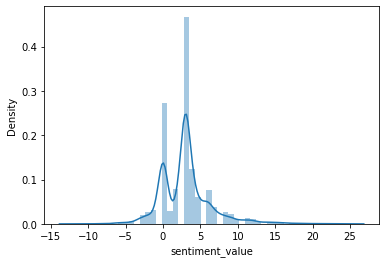

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(prod_min['sentiment_value']); 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

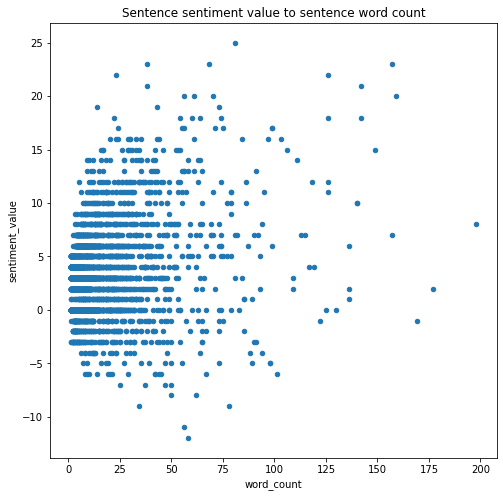

In [111]:
prod_min.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Simple Sentiment Analysis: Negative words and Positive words

In [112]:
#negative words
neg = pd.read_csv('negative-words.txt',sep=' ',encoding='latin-1', header=None)
neg.shape 

(4783, 1)

In [113]:
#positive words
positive = pd.read_csv('positive-words.txt',sep=' ',encoding='latin-1', header=None)
positive.shape 

(2006, 1)

In [114]:
negative_word_list=neg[0].to_list()
print(negative_word_list)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [115]:
positive_word_list= positive[0].to_list()
print(positive_word_list)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [116]:
from nltk import word_tokenize, sent_tokenize

In [117]:
# Tokenize
prod_review_words = nltk.word_tokenize(prod_review_join)
print(prod_review_words[0:15])

['bad', 'expery', 'iphon', 'xr', 'phon', 'back', 'camer', 'find', 'defect', 'non', 'funct', 'amazon', 'careless', 'get', 'respons']


In [118]:
#Calculating postive words
#Now we will count the number of positive words.
word_pos=[]
numPosWords = 0
for word in prod_review_words:
    if word in positive_word_list:
        word_pos.append(word)
        numPosWords += 1
print(numPosWords)
print(word_pos)

4017
['work', 'lead', 'thank', 'joy', 'work', 'flawless', 'work', 'charm', 'work', 'excel', 'best', 'feat', 'happy', 'good', 'happy', 'good', 'good', 'right', 'seamless', 'work', 'lead', 'thank', 'joy', 'work', 'flawless', 'work', 'charm', 'work', 'excel', 'best', 'feat', 'happy', 'good', 'happy', 'good', 'good', 'right', 'seamless', 'best', 'best', 'thank', 'ready', 'enjoy', 'happy', 'happy', 'work', 'good', 'support', 'happy', 'enjoy', 'good', 'excel', 'support', 'respect', 'honest', 'superb', 'perfect', 'snappy', 'fast', 'impress', 'excel', 'protect', 'protect', 'crisp', 'best', 'perfect', 'good', 'perfect', 'right', 'top', 'easy', 'good', 'best', 'good', 'good', 'work', 'smart', 'feat', 'beauty', 'fast', 'best', 'fast', 'trust', 'best', 'feat', 'fast', 'impress', 'good', 'excel', 'freedom', 'easy', 'work', 'good', 'regard', 'fast', 'good', 'good', 'refresh', 'feat', 'easy', 'feat', 'feat', 'perfect', 'fast', 'thank', 'good', 'good', 'happy', 'work', 'work', 'pretty', 'honest', 'fea

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(word_pos) 
print(vectorizer.vocabulary_)

{'work': 105, 'lead': 51, 'thank': 97, 'joy': 50, 'flawless': 34, 'charm': 11, 'excel': 26, 'best': 5, 'feat': 32, 'happy': 44, 'good': 40, 'right': 74, 'seamless': 77, 'ready': 66, 'enjoy': 22, 'support': 94, 'respect': 72, 'honest': 46, 'superb': 93, 'perfect': 59, 'snappy': 84, 'fast': 29, 'impress': 49, 'protect': 63, 'crisp': 19, 'top': 99, 'easy': 21, 'smart': 81, 'beauty': 4, 'trust': 101, 'freedom': 36, 'regard': 71, 'refresh': 69, 'pretty': 61, 'sweet': 95, 'classy': 13, 'wow': 107, 'hug': 48, 'greatest': 42, 'hot': 47, 'bright': 8, 'standout': 88, 'clear': 14, 'afford': 0, 'sharp': 79, 'recommend': 67, 'smooth': 82, 'satisfy': 76, 'thrill': 98, 'tough': 100, 'sexy': 78, 'lucky': 53, 'cashback': 9, 'enough': 23, 'strong': 89, 'outdo': 57, 'prefer': 60, 'win': 104, 'refund': 70, 'soft': 85, 'avid': 1, 'comfort': 15, 'enthusiast': 25, 'worthy': 106, 'heal': 45, 'goood': 41, 'stronger': 90, 'speedy': 87, 'delight': 20, 'trustworthy': 102, 'fav': 31, 'prompt': 62, 'cool': 17, 'fin

In [120]:
#Calculating negative words
#Now we will count the number of negative words.
word_negative=[]
numNegWords = 0
for word in prod_review_words:
    if word in negative_word_list:
        word_negative.append(word)
        numNegWords += 1
print(numNegWords)
print(word_negative)

952
['bad', 'defect', 'careless', 'hang', 'glitch', 'bomb', 'dark', 'problem', 'lie', 'fail', 'pleas', 'dead', 'hang', 'bad', 'defect', 'careless', 'hang', 'glitch', 'bomb', 'dark', 'problem', 'lie', 'fail', 'pleas', 'dead', 'hang', 'defect', 'defect', 'poor', 'defect', 'slow', 'complaint', 'die', 'hard', 'hang', 'numb', 'unhappy', 'bad', 'disappoint', 'bulky', 'cheap', 'deny', 'defect', 'lag', 'bulky', 'bump', 'poor', 'crack', 'complain', 'numb', 'miss', 'poor', 'crazy', 'disappoint', 'worst', 'disappoint', 'bad', 'fraud', 'doubt', 'unhappy', 'problem', 'regret', 'hum', 'scam', 'defect', 'problem', 'defect', 'hang', 'worst', 'drawback', 'numb', 'cloud', 'limit', 'annoy', 'difficult', 'miss', 'hard', 'slow', 'hang', 'defect', 'defect', 'pleas', 'defect', 'disappoint', 'mad', 'defect', 'die', 'mad', 'difficult', 'complaint', 'cheap', 'flaw', 'complain', 'complain', 'lack', 'limit', 'bash', 'mad', 'problem', 'problem', 'problem', 'problem', 'dark', 'lack', 'worry', 'unknown', 'risk', 'la

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_2 = CountVectorizer()
y = vectorizer_2.fit_transform(word_negative) 
print(vectorizer_2.vocabulary_)

{'bad': 5, 'defect': 31, 'careless': 17, 'hang': 60, 'glitch': 58, 'bomb': 11, 'dark': 29, 'problem': 86, 'lie': 68, 'fail': 51, 'pleas': 84, 'dead': 30, 'poor': 85, 'slow': 101, 'complaint': 22, 'die': 37, 'hard': 61, 'numb': 78, 'unhappy': 117, 'disappoint': 39, 'bulky': 14, 'cheap': 18, 'deny': 35, 'lag': 67, 'bump': 15, 'crack': 24, 'complain': 21, 'miss': 75, 'crazy': 26, 'worst': 125, 'fraud': 56, 'doubt': 43, 'regret': 88, 'hum': 64, 'scam': 95, 'drawback': 45, 'cloud': 19, 'limit': 69, 'annoy': 3, 'difficult': 38, 'mad': 74, 'flaw': 55, 'lack': 66, 'bash': 6, 'worry': 124, 'unknown': 118, 'risk': 91, 'destroy': 36, 'bloody': 8, 'dud': 46, 'suspect': 114, 'break': 12, 'loud': 73, 'addict': 1, 'damn': 28, 'wrong': 126, 'blurry': 10, 'concern': 23, 'blind': 7, 'stun': 110, 'pan': 81, 'panick': 82, 'sad': 94, 'object': 79, 'strain': 106, 'suck': 112, 'crap': 25, 'freak': 57, 'sorry': 104, 'distort': 41, 'trash': 115, 'drain': 44, 'upset': 119, 'shock': 100, 'blow': 9, 'clueless': 2

In [122]:
#Calculating percentages
#Now we calculate the percentages of postive and negative.
numWords = len(prod_review_words)
percntPos = numPosWords / numWords
percntNeg = numNegWords / numWords
print("Positive: " + "{:.0%}".format(percntPos) + "  Negative: " + "{:.0%}".format(percntNeg))

Positive: 11%  Negative: 3%


In [123]:
#Deciding if it is postive or negative
#We are going assume that a simple majority will define if the Tweet is positive or negative.
if numPosWords > numNegWords:
    print("Positive " + str(numPosWords) + ":" + str(numNegWords))
elif numNegWords > numPosWords:
    print("Negative " + str(numPosWords) + ":" + str(numNegWords))
elif numNegWords == numPosWords:
    print("Neither " + str(numPosWords) + ":" + str(numNegWords))
    
print()

Positive 4017:952

